## CNN - Example

In [18]:
import tensorflow as tf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from tensorflow.keras.layers import Input, Conv2D, Dense, Flatten, Dropout, GlobalMaxPooling2D
from tensorflow.keras.models import Model

### Load data from Keras

In [2]:
# Load in the data
cifar10 = tf.keras.datasets.cifar10

(x_train, y_train), (x_test, y_test) = cifar10.load_data()
x_train, x_test = x_train / 255.0, x_test / 255.0
y_train, y_test = y_train.flatten(), y_test.flatten()
print("x_train.shape:", x_train.shape)
print("y_train.shape", y_train.shape)

170500096/170498071 [==============================] - 60s 0us/step
x_train.shape: (50000, 32, 32, 3)
y_train.shape (50000,)


#### Find number of classes

In [3]:
# number of classes
K = len(set(y_train))
print("number of classes:", K)

number of classes: 10


### Build functional Model

In [4]:
# Build the model using the functional API
i = Input(shape=x_train[0].shape)
x = Conv2D(32, (3, 3), strides=2, activation='relu')(i)
x = Conv2D(64, (3, 3), strides=2, activation='relu')(x)
x = Conv2D(128, (3, 3), strides=2, activation='relu')(x)
x = Flatten()(x)
x = Dropout(0.5)(x)
x = Dense(1024, activation='relu')(x)
x = Dropout(0.2)(x)
x = Dense(K, activation='softmax')(x)

model = Model(i, x)

### Compile/Summary/Fit

In [5]:
# Compile and fit
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])
model.summary()

Model: "functional_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 32, 32, 3)]       0         
_________________________________________________________________
conv2d (Conv2D)              (None, 15, 15, 32)        896       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 7, 7, 64)          18496     
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 3, 3, 128)         73856     
_________________________________________________________________
flatten (Flatten)            (None, 1152)              0         
_________________________________________________________________
dropout (Dropout)            (None, 1152)              0         
_________________________________________________________________
dense (Dense)                (None, 1024)             

In [6]:
history = model.fit(x_train, y_train, validation_data=(x_test, y_test), epochs=15)

Epoch 1/15
1563/1563 [==============================] - 39s 25ms/step - loss: 1.5589 - accuracy: 0.4293 - val_loss: 1.3183 - val_accuracy: 0.5301
Epoch 2/15
1563/1563 [==============================] - 42s 27ms/step - loss: 1.2662 - accuracy: 0.5468 - val_loss: 1.1324 - val_accuracy: 0.5978
Epoch 3/15
1563/1563 [==============================] - 40s 25ms/step - loss: 1.1343 - accuracy: 0.5947 - val_loss: 1.0257 - val_accuracy: 0.6393
Epoch 4/15
1563/1563 [==============================] - 38s 24ms/step - loss: 1.0495 - accuracy: 0.6269 - val_loss: 0.9898 - val_accuracy: 0.6510
Epoch 5/15
1563/1563 [==============================] - 36s 23ms/step - loss: 0.9829 - accuracy: 0.6523 - val_loss: 0.9246 - val_accuracy: 0.6842
Epoch 6/15
1563/1563 [==============================] - 36s 23ms/step - loss: 0.9142 - accuracy: 0.6757 - val_loss: 0.9090 - val_accuracy: 0.6825
Epoch 7/15
1563/1563 [==============================] - 38s 24ms/step - loss: 0.8704 - accuracy: 0.6895 - val_loss: 0.8850 -

### Model Evaluation

In [16]:
print(model.metrics_names)
print(model.evaluate(x_test,y_test,verbose=0))

['loss', 'accuracy']
[0.8085067272186279, 0.7276999950408936]


In [24]:
pd.DataFrame(history.history).head(15)

,loss,accuracy,val_loss,val_accuracy
0,1.558907,0.42930,1.318326,0.5301
1,1.266198,0.54678,1.132365,0.5978
2,1.134344,0.59468,1.025658,0.6393
3,1.049459,0.62688,0.989784,0.6510
4,0.982851,0.65226,0.924605,0.6842
5,0.914196,0.67566,0.909017,0.6825
6,0.870430,0.68948,0.885033,0.6919
7,0.823942,0.70786,0.850895,0.7027
8,0.785013,0.72046,0.833519,0.7143
9,0.752997,0.73186,0.856826,0.6961


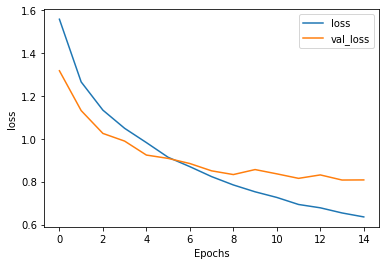

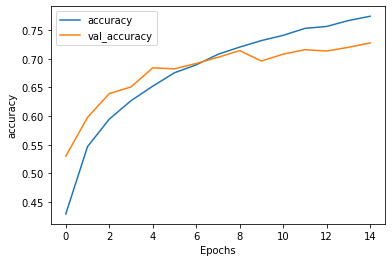

In [25]:
def plot_graphs(history, string):
  plt.plot(history.history[string])
  plt.plot(history.history['val_'+string])
  plt.xlabel("Epochs")
  plt.ylabel(string)
  plt.legend([string, 'val_'+string])
  plt.show()

plot_graphs(history, "loss")    
plot_graphs(history, "accuracy")



### Predictions and Reports

              precision    recall  f1-score   support

           0       0.76      0.74      0.75      1000
           1       0.82      0.86      0.84      1000
           2       0.66      0.61      0.63      1000
           3       0.54      0.53      0.54      1000
           4       0.67      0.68      0.68      1000
           5       0.64      0.61      0.63      1000
           6       0.78      0.80      0.79      1000
           7       0.76      0.81      0.78      1000
           8       0.83      0.81      0.82      1000
           9       0.79      0.81      0.80      1000

    accuracy                           0.73     10000
   macro avg       0.73      0.73      0.73     10000
weighted avg       0.73      0.73      0.73     10000

[[740  30  47  15  26   3  10  17  70  42]
 [ 12 859   6   7   4   8   5   5  17  77]
 [ 69   6 609  55  87  62  56  29  15  12]
 [ 14   8  74 533  68 168  68  41  11  15]
 [ 16   6  53  65 683  32  47  82   8   8]
 [  6   5  44 180  50 615 

<AxesSubplot:>

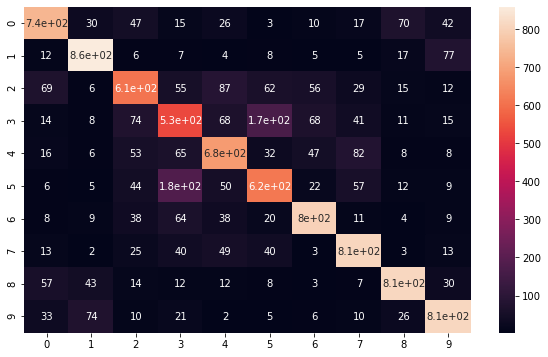

In [9]:
from sklearn.metrics import classification_report,confusion_matrix
y_prediction = np.argmax(model.predict(x_test), axis=-1)
print(classification_report(y_test,y_prediction))
print(confusion_matrix(y_test,y_prediction))

import seaborn as sns
plt.figure(figsize=(10,6))
sns.heatmap(confusion_matrix(y_test,y_prediction),annot=True)

#### Get the Y Labels

In [10]:
# label mapping
labels = '''airplane
automobile
bird
cat
deer
dog
frog
horse
ship
truck'''.split()

### Misclassified Examples

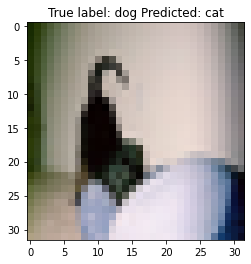

In [39]:
# Show some misclassified examples
misclassified_idx = np.where(y_prediction != y_test)[0]

i = np.random.choice(misclassified_idx)
plt.imshow(x_test[i], cmap='gray')
plt.title("True label: %s Predicted: %s" % (labels[y_test[i]], labels[y_prediction[i]]));

#### Rate of correct prediction

In [38]:
n = x_train.shape[0] + x_test.shape[0]
w = len(misclassified_idx)
print("Total sample size : " + str(n))
print("Total wrong match : " + str(w))
print("% of incorrect match : " + str(w/n*100) )

Total sample size : 60000
Total wrong match : 2723
% of incorrect match : 4.538333333333333
